In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
h3 = pd.read_csv('ORG/habu_1985_1995_gikou_3s.csv', encoding='cp932')
h6 = pd.read_csv('ORG/habu_1985_1995_gikou_6s.csv', encoding='cp932')
m3 = pd.read_csv('ORG/miura_2016_2016_gikou_3s.csv', encoding='cp932')
m6 = pd.read_csv('ORG/miura_2016_2016_gikou_6s.csv', encoding='cp932')
print((h3.shape, h6.shape, m3.shape, m6.shape))

((612, 17), (612, 17), (42, 15), (42, 15))


In [3]:
def gen_table(dat, target):
    df = pd.DataFrame(index=dat.index)
    df['black'] = [v.find(target) > -1 for v in dat['先手対局者']]
    r1b = dat['先手狭義一致率']
    r2b = dat['先手広義一致率']
    r1w = dat['後手狭義一致率']
    r2w = dat['後手広義一致率']
    df['r1'] = np.where(df.black, r1b, r1w)
    df['r2'] = np.where(df.black, r2b, r2b)
    res = [v.find('先手') > -1 for v in dat['結果']]
    df['res'] = (df.black == res)
    if '対局日付' in dat.columns.values:
        df['year'] = [v.split('-')[0] for v in dat['対局日付']]
    return df

In [4]:
tbl_h6 = gen_table(h6, '羽生　善治')
tbl_m6 = gen_table(m6, '三浦　弘行')

In [5]:
def plot_rate(tbl, rate):
    bins = 10
    x   = tbl[rate].values
    win = tbl.res.values
    plt.hist(x, normed=True, alpha=0.7,
             bins=bins, label='all')
    plt.hist(x[win], normed=True, alpha=0.7,
             bins=bins, label='win')
    plt.legend()

羽生広義一致率

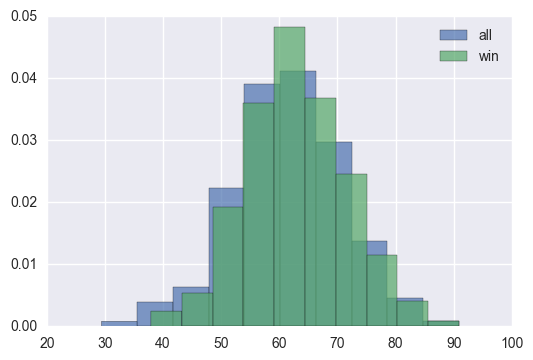

In [6]:
plot_rate(tbl_h6, 'r1')

三浦広義一致率

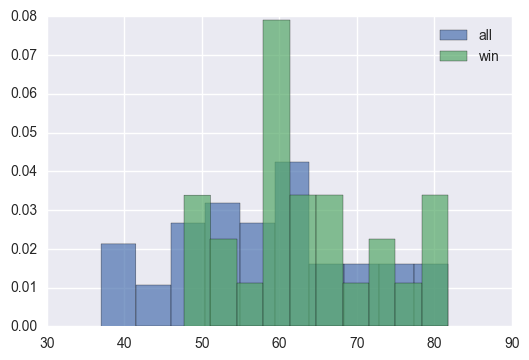

In [7]:
plot_rate(tbl_m6, 'r1')

In [8]:
def plot_rate_by_year(tbl, rate):
    win = tbl.res.values
    agg = tbl.groupby('year')[rate].mean().reset_index(name='all')
    agg['win'] = tbl[win].groupby('year')[rate].mean().values
    xy = agg.set_index('year')
    xy.plot()

羽生一致率推移

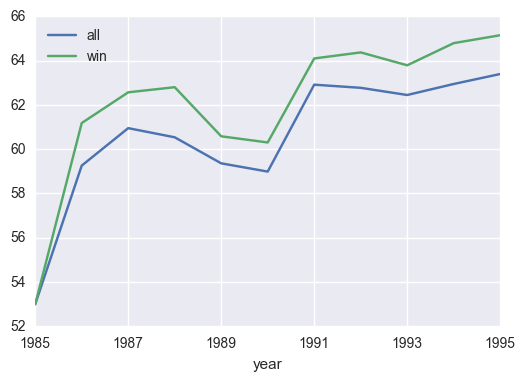

In [9]:
plot_rate_by_year(tbl_h6, 'r1')